In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# import results files
epidural = pd.read_csv('label_files/Results_Epidural Hemorrhage Detection_2020-11-16_21.31.26.148.csv')
intraparenchymal = pd.read_csv('label_files/Results_Intraparenchymal Hemorrhage Detection_2020-11-16_21.39.31.268.csv')
multiple = pd.read_csv('label_files/Results_Multiple Hemorrhage Detection_2020-11-16_21.36.24.018.csv')
subarachnoid = pd.read_csv('label_files/Results_Subarachnoid Hemorrhage Detection_2020-11-16_21.36.18.668.csv')
subdural = pd.read_csv('label_files/Results_Subdural Hemorrhage Detection_2020-11-16_21.37.19.745.csv')

In [3]:
def clean_labels(raw_data, hem_type):
    
    # choose best position label
    for i in range(len(raw_data)):
        row = raw_data.loc[i]
        if pd.isna(raw_data.loc[i,'Correct Label']):
            label = raw_data.loc[i,'Majority Label']
        else:
            label = raw_data.loc[i,'Correct Label']
        raw_data.loc[i,'Label'] = label
    
    # give overall type label
    raw_data['hem_type'] = hem_type
    
    # drop rows with no labels
    cleaned = raw_data[raw_data['Label'].str.contains('x')]
    return cleaned

In [4]:
# clean and assign labels
epi = clean_labels(epidural, "epidural")
intra = clean_labels(intraparenchymal, "intraparenchymal")
multi = clean_labels(multiple, "multiple")
suba = clean_labels(subarachnoid, "subarachnoid")
subd = clean_labels(subdural, "subdural")

In [5]:
# combine all label files
types_list = [epi, intra, multi, suba, subd] #, multi, suba, subd
all_labels = pd.concat(types_list)

# drop flagged rows
all_labels = all_labels.loc[all_labels['Labeling State'] != 'Flagged']
all_labels.reset_index(inplace=True)

#all_labels.to_csv('all_labels.csv')
all_labels

,index,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes,Label,hem_type
0,0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",epidural
1,1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",epidural
2,2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",epidural
3,3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",epidural
4,4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",epidural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,738,1198392,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.68359375, ""y"": 0.42578125}, {""x"": 0.6...",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",subdural
4643,739,1198392,ID_ff1e93267.jpg,https://go.centaurlabs.com/problem/1198392,Labeled,"['[{""x"": 0.25159726, ""y"": 0.24648584}, {""x"": 0...",19.0,5.0,"[{""x"": 0.630859375, ""y"": 0.24609375}, {""x"": 0....",3.0,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",0.48,0.607623,NaN,NaN,"[[{'x': 0.685546875, 'y': 0.43359375}, {'x': 0...",subdural
4644,740,1198414,ID_ff2f3dbb7.jpg,https://go.centaurlabs.com/problem/1198414,Labeled,"['[{""x"": 0.70854944, ""y"": 0.6837957}, {""x"": 0....",14.0,6.0,"[{""x"": 0.70703125, ""y"": 0.67578125}, {""x"": 0.7...",1.0,"[[{'x': 0.70703125, 'y': 0.67578125}, {'x': 0....",0.15,0.153092,NaN,NaN,"[[{'x': 0.70703125, 'y': 0.67578125}, {'x': 0....",subdural
4645,741,1198334,ID_04ab5246e.jpg,https://go.centaurlabs.com/problem/1198334,Labeled,"['[{""x"": 0.56073856, ""y"": 0.6705539}, {""x"": 0....",13.0,6.0,[],0.0,"[[{'x': 0.560546875, 'y': 0.669921875}, {'x': ...",0.33,0.833333,NaN,NaN,"[[{'x': 0.560546875, 'y': 0.669921875}, {'x': ...",subdural


In [6]:
#data = np.zeros([1838, (512*512)])

all_labels.loc[:,'hem_type'].value_counts()

intraparenchymal    1262
multiple            1047
subarachnoid        1028
subdural             734
epidural             576
Name: hem_type, dtype: int64

In [7]:
# add normal images

In [8]:
# test with subset of data (3 classes, 200 images each)
n_samples = 200

epi_sample = epi.sample(n_samples, random_state=0)
intra_sample = intra.sample(n_samples, random_state=0)
suba_sample = suba.sample(n_samples, random_state=0)

test_data = pd.concat([epi_sample, intra_sample, suba_sample])
test_data.reset_index(inplace=True)

test_data.loc[:,'hem_type'].value_counts()

epidural            200
intraparenchymal    200
subarachnoid        200
Name: hem_type, dtype: int64

In [9]:
data = np.zeros([(3*n_samples), (512*512)])

image_type = 'brain_bone_window'

for n, file_name in enumerate(test_data.Origin):
    folder = test_data.loc[n,'hem_type']
    file_dir = f'{folder}/{image_type}/{file_name}'
    data[n,:] = np.mean(matplotlib.image.imread(file_dir),axis=2).reshape(-1)
# Now we can use the file name to read the data

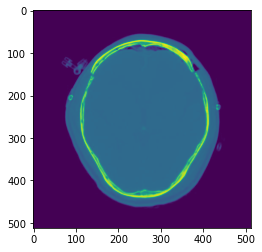

In [10]:
plt.imshow(data[15].reshape(512,512))

In [11]:
y = test_data.loc[:,'hem_type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(480,) (120,)


Text(0.5, 1.0, 'subarachnoid')

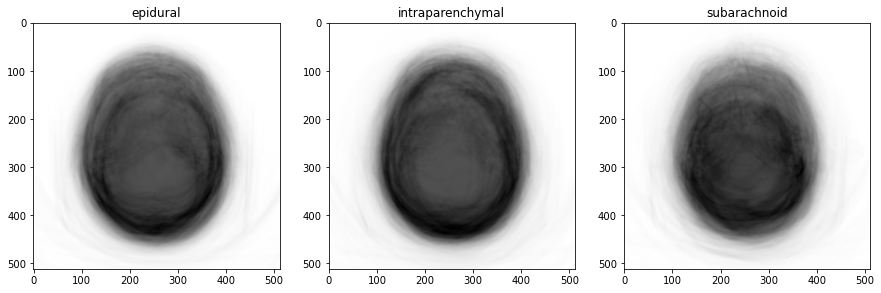

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

ax0.imshow(X_train[y_train == 'epidural'].mean(0).reshape(512,512), cmap='Greys')
ax0.set_title('epidural')
ax1.imshow(X_train[y_train == 'intraparenchymal'].mean(0).reshape(512,512), cmap='Greys')
ax1.set_title('intraparenchymal')
ax2.imshow(X_train[y_train == 'subarachnoid'].mean(0).reshape(512,512), cmap='Greys')
ax2.set_title('subarachnoid')

In [13]:
from sklearn.linear_model import LogisticRegression

# fit logistic regression to flattened/label-processed data
clf = LogisticRegression(solver='lbfgs', max_iter=5000)
clf.fit(X_train, y_train)

# print score on the test data
print("Logistic Regression Score: %.4f"%clf.score(X_test,y_test))

Logistic Regression Score: 0.5667


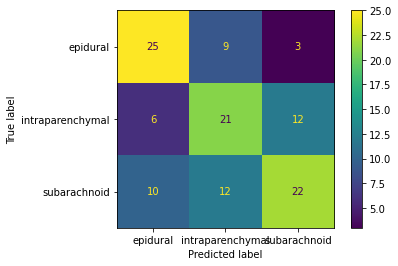

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test) 

In [15]:
# test with different image type
data1 = np.zeros([(3*n_samples), (512*512)])

image_type1 = 'max_contrast_window'

for n, file_name in enumerate(test_data.Origin):
    folder = test_data.loc[n,'hem_type']
    file_dir = f'{folder}/{image_type1}/{file_name}'
    data1[n,:] = np.mean(matplotlib.image.imread(file_dir),axis=2).reshape(-1)
# Now we can use the file name to read the data

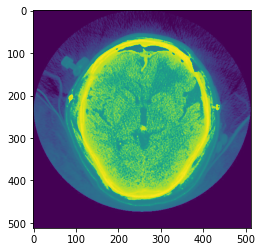

In [16]:
plt.imshow(data1[15].reshape(512,512))

In [17]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, y, test_size=0.2, random_state=0)
print(y_train1.shape, y_test1.shape)

(480,) (120,)


In [18]:
from sklearn.linear_model import LogisticRegression

# fit logistic regression to flattened/label-processed data
clf1 = LogisticRegression(solver='lbfgs', max_iter=5000)
clf1.fit(X_train1, y_train1)

# print score on the test data
print("Logistic Regression Score: %.4f"%clf.score(X_test1,y_test1))

Logistic Regression Score: 0.3833


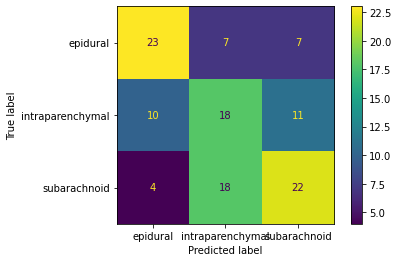

In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf1, X_test1, y_test1) 